In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
rng = np.random.default_rng(42)
n = 120

true_w = 3.5
true_b = 7.0

x = rng.uniform(0,10, size = n)             #feature (Dependent variabl)
noise = rng.normal(0,3.0 ,size = n)         #Noise
y = true_w * x +  true_b + noise            #target(perdicted variable)

print("Dataset created!!")
print(f"The True value is w(slop) is {true_w} and the true value of b(intercept) is {true_b}")
print(f"The range of x is from {x.min()} to {x.max()} and the range of y is from {y.min()} to {y.max()}")

Dataset created!!
The True value is w(slop) is 3.5 and the true value of b(intercept) is 7.0
The range of x is from 0.07362269751005512 to 9.756223516367559 and the range of y is from 6.186866720023511 to 45.224345033007765


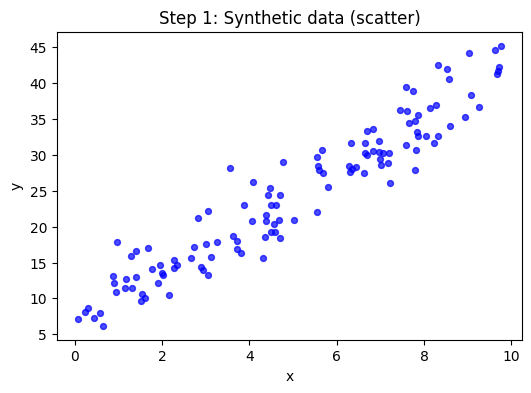

In [34]:
plt.figure(figsize = (6,4))
plt.title("Step 1: Synthetic data (scatter)")
plt.scatter(x,y , s= 18 , color = "blue" , alpha = 0.7 , marker= 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [12]:
#defining the model, loss function , gradiant desecent
def predict (x,w,b):
    return w * x + b

def MSE(x,y,w,b):
    yhat = predict(x,w,b)
    return np.mean((yhat -y)**2)

def gradiant_descent(x,y,w,b):
    yhat = predict(x,w,b)
    error = yhat - y 
    n = x.shape[0]
    dw = (2.0/ n) * np.dot(error , x)
    db = (2.0 / n) * np.sum(error)
    return dw , db


In [38]:
#model Traning
w = 0
b = 0
ir= 0.01
epochs = 2000
loss_history = []
for epoch in range(epochs):
    dw , db = gradiant_descent(x,y,w,b)
    w -= ir * dw
    b -= ir * db
    if epoch % 50 == 0 or epoch == epochs -1:
        loss = MSE(x,y,w,b)
        loss_history.append((epoch,loss))
        if epoch % 200 == 0 or epoch == epochs -1:
            print(f"epoch {epoch:4d}|loss : {loss} | w : {w} | b : {b}")


print("\nTraining complete.")
print(f"Estimated parameters: w={w:.4f}, b={b:.4f}")
print(f"True parameters:      w={true_w:.4f}, b={true_b:.4f}")

epoch    0|loss : 95.89248437908049 | w : 2.9560493665556242 | b : 0.488558955406032
epoch  200|loss : 10.632495871282375 | w : 3.8918563746268786 | b : 4.446452814697522
epoch  400|loss : 9.385750979814576 | w : 3.6567137279421607 | b : 5.958918112724982
epoch  600|loss : 9.179927274770773 | w : 3.561172614269828 | b : 6.573449849105629
epoch  800|loss : 9.145948071929942 | w : 3.5223531804901764 | b : 6.8231410357474145
epoch 1000|loss : 9.140338483736722 | w : 3.5065804060159214 | b : 6.924593385554084
epoch 1200|loss : 9.139412403161936 | w : 3.5001717495675084 | b : 6.965814621352285
epoch 1400|loss : 9.139259517566513 | w : 3.4975678400561656 | b : 6.982563275118996
epoch 1600|loss : 9.13923427785636 | w : 3.4965098422062506 | b : 6.989368442348102
epoch 1800|loss : 9.13923011106114 | w : 3.496079965727998 | b : 6.992133458668884
epoch 1999|loss : 9.139229424400188 | w : 3.495905841569417 | b : 6.9932534458388655

Training complete.
Estimated parameters: w=3.4959, b=6.9933
True p

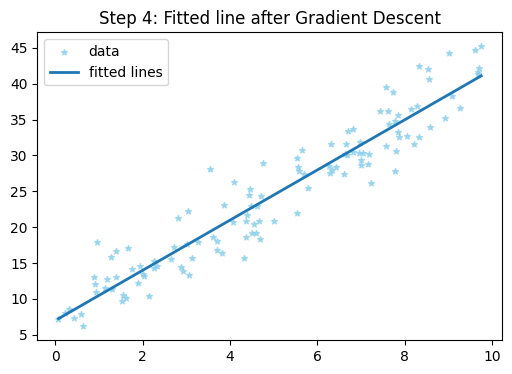

In [39]:
#Visualize fitted line vs data
x_line = np.linspace(x.min() , x.max(), 200)
y_line = predict(x_line , w, b)

plt.figure(figsize= (6,4))
plt.scatter(x , y , s = 18 , marker= '*' , alpha = 0.7 , color = "skyblue" , label= "data")
plt.title("Step 4: Fitted line after Gradient Descent" )
plt.plot(x_line , y_line , lw = 2 , label= "fitted lines")
plt.legend()
plt.show()

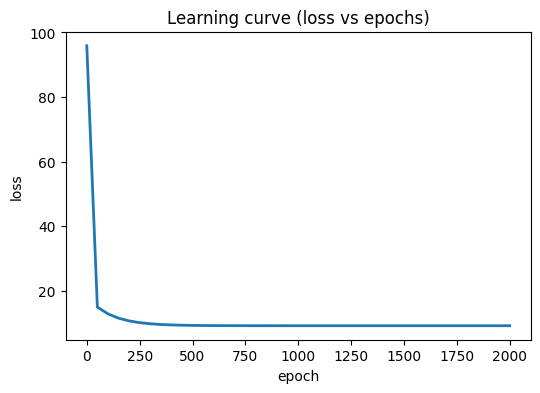

In [40]:
#Plot learning curve (loss vs epochs)
epochs_shown = [e for e, _ in loss_history]
losses_shown = [l for _, l in loss_history]
plt.figure(figsize= (6,4))
plt.plot(epochs_shown , losses_shown , lw = 2)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Learning curve (loss vs epochs)")
plt.show()